<a href="https://colab.research.google.com/github/ksshu/Deep-Neural-network/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
train_data='/content/drive/MyDrive/k s shubham/cnn'
validation_data='/content/drive/MyDrive/k s shubham/cnn'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data, target_size=(150, 150), batch_size=4, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_data, target_size=(150, 150), batch_size=4, class_mode='categorical')

Found 33 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [ ]:
num_classes=2

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6585 - loss: 0.6467 - val_accuracy: 0.6667 - val_loss: 0.5381
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5803 - loss: 0.6579 - val_accuracy: 0.6667 - val_loss: 0.6019
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6629 - loss: 0.5627 - val_accuracy: 0.6970 - val_loss: 0.3684
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7856 - loss: 0.4854 - val_accuracy: 0.9394 - val_loss: 0.3801
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8318 - loss: 0.5102 - val_accuracy: 0.9697 - val_loss: 0.3679
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8013 - loss: 0.4965 - val_accuracy: 0.7273 - val_loss: 0.3446
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6183 - loss: 0.5507 - val_accuracy: 0.9091 - val_loss: 0.3605
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7366 - loss: 0.5479 - val_accuracy: 0.6364 - val_loss: 0.4402
Epoch 9/

In [ ]:
# Path to save the model in your Google Drive
model_save_path = '/content/drive/MyDrive/my_models/model.h5'

# Path to save the model in your Google Drive
model.save('/content/drive/MyDrive/my_models/model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Path to the saved model in Drive
model_path = '/content/drive/MyDrive/my_models/model.h5'

# Load the model
model = load_model(model_path)
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/my_models/model.h5')  # Load the SavedModel


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


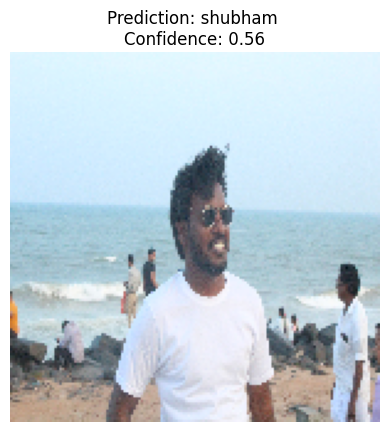

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Step 1: Load the Trained Model
model_path = '/content/drive/MyDrive/my_models/model.h5'  # Path to your saved model
model = load_model(model_path)

# Step 2: Define Helper Function for Predictions
def predict_image(image_path, model, class_names, image_size=(150, 150)):
    # Load the image and preprocess it
    img = load_img(image_path, target_size=image_size)  # Resize the image
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    prediction = model.predict(img_array)
    predicted_class = class_names[int(prediction[0][0] > 0.5)]  # 0 = Cat, 1 = Dog
    confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]

    # Display the result
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} \nConfidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()

# Step 3: Class Names
class_names = ["shubham", "manish"]  # 0 = Cat, 1 = Dog

# Step 4: Predict for a Test Image
image_path = '/content/drive/MyDrive/test_images/IMG_8442.JPG'  # Path to the test image
predict_image(image_path, model, class_names)


In [ ]:
pip install gTTS


In [ ]:
pip install tensorflow pillow pyttsx3


In [ ]:
!sudo apt-get update
!sudo apt-get install espeak-ng


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [60.9 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,551 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 k

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import pyttsx3
import numpy as np
from PIL import Image
from gtts import gTTS
import os

# Load a pre-trained model (e.g., MobileNetV2 for cat/dog classification)
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Initialize pyttsx3 TTS engine
engine = pyttsx3.init()

# Function to prepare and predict the image
def predict_image(img_path):
    # Load the image and resize it to fit the model's input size (224x224 for MobileNetV2)
    img = Image.open(img_path).resize((224, 224))
    img_array = np.array(img)

    # Preprocess the image to match the input format for MobileNetV2
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make the prediction
    predictions = model.predict(img_array)

    # Decode predictions into labels (this model uses ImageNet classes)
    decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)
    label = decoded_predictions[0][0][1]  # Get the label (top prediction)

    return label

# Function to convert label to speech (using pyttsx3)
def text_to_speech(label):
    engine.say(f"The predicted label is {label}")
    engine.runAndWait()

# Function to convert label to speech (using gTTS)
def text_to_speech_gTTS(label):
    tts = gTTS(text=f"The predicted label is {label}", lang='en')
    tts.save("output.mp3")
    os.system("start output.mp3")  # For Windows
    # For Linux/macOS, use os.system("mpg321 output.mp3")

# Example usage:
img_path = '/content/drive/MyDrive/test_images/IMG_8543.JPG'  # Replace with the path to your image

# Make sure the label is correctly predicted
label = predict_image(img_path)

# Print predicted label
print(f"Predicted Label: {label}")

# Convert label to speech using pyttsx3
text_to_speech(label)

# Alternatively, convert label to speech using gTTS
# text_to_speech_gTTS(label)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted Label: bell_cote
